In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator
import statannot
import pymannkendall as mk
from scipy import stats
from scipy.stats import mannwhitneyu, normaltest,wilcoxon

sns.set(font="Arial")
plt.rcParams["font.family"] = "Arial"
sns.set_style("whitegrid")
plt.rcParams["mathtext.fontset"]='custom'

In [2]:
sams=pd.read_csv("sams_after_cutoff_04102024.csv")

In [3]:
sams['PreBiopsyDrugsConsolidateType_sy'].value_counts()

Primary                                  2071
Multiple therapy                          880
Untreated                                 849
Chemotherapy                              495
Targeted therapy                           76
Hormonal therapy                           70
Androgen/estrogen deprivation therapy      46
Immunotherapy                              26
Nuclear therapy                             7
Randomized trial                            4
Experimental therapy                        4
Oncolytic virus                             1
Name: PreBiopsyDrugsConsolidateType_sy, dtype: int64

In [4]:
least50=sams.PreBiopsyDrugsConsolidateType_sy.value_counts().index.tolist()[1:6]
least50

['Multiple therapy',
 'Untreated',
 'Chemotherapy',
 'Targeted therapy',
 'Hormonal therapy']

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Hormonal therapy vs. Untreated: Mann-Whitney-Wilcoxon test two-sided, P_val:1.522e-01 U_stat=3.199e+04
Untreated vs. Targeted therapy: Mann-Whitney-Wilcoxon test two-sided, P_val:3.711e-02 U_stat=3.565e+04
Multiple therapy vs. Untreated: Mann-Whitney-Wilcoxon test two-sided, P_val:9.849e-08 U_stat=4.177e+05
Chemotherapy vs. Untreated: Mann-Whitney-Wilcoxon test two-sided, P_val:6.755e-08 U_stat=2.394e+05
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Hormonal therapy vs. Untreated: Mann-Whitney-Wilcoxon test two-sided, P_val:3.869e-01 U_stat=3.130e+04
Untreated vs. Targeted therapy: Mann-Whitney-Wilcoxon test two-sided, P_val:6.967e-02 U_stat=3.569e+04
Multiple therapy vs. Unt

Text(-4, -1, 'Consolidated pretreatment type')

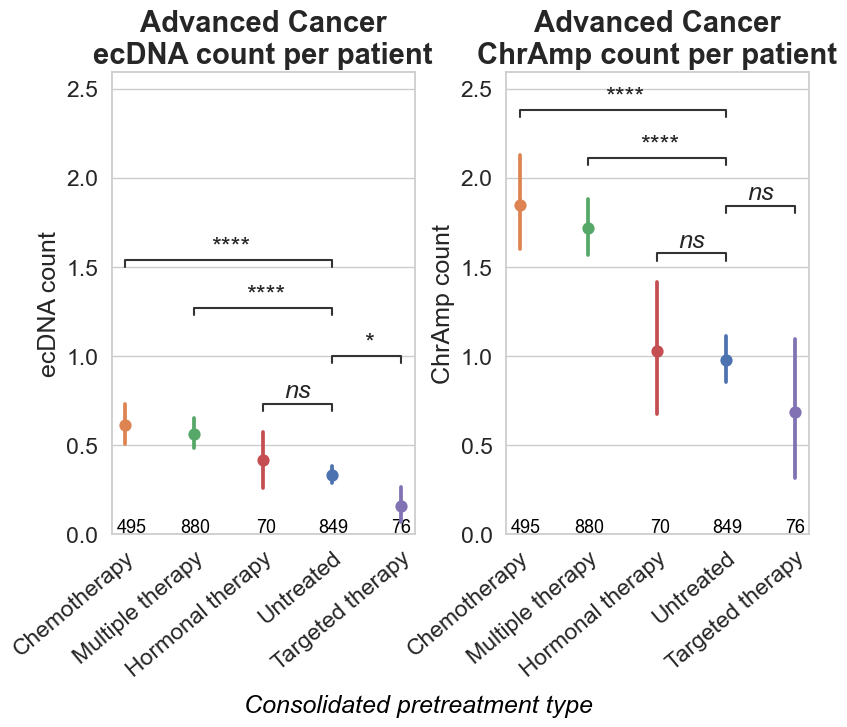

<Figure size 500x800 with 0 Axes>

<Figure size 500x800 with 0 Axes>

In [5]:
sns.set(font="Arial",font_scale=1.5,style="whitegrid")
fig = plt.figure(figsize=(9, 6))

gs = fig.add_gridspec(1, 2, width_ratios=[1,1])
gs.update(wspace=0.3)

ax2 = plt.subplot(gs[0, 1])#, sharey=ax1)
ax2.set(ylim=(0, 2))
ax1 = plt.subplot(gs[0, 0], sharey=ax2)

# FIRST
sns.set(font="Arial",font_scale=1.5,style="whitegrid")
plt.figure(figsize=(5,8))

plt.rcParams["font.style"] = "italic"
data=sams[sams['PreBiopsyDrugsConsolidateType_sy'].isin(least50)].reset_index(drop=True)

x='PreBiopsyDrugsConsolidateType_sy'
y='ecDNA_count'
hue='PreBiopsyDrugsConsolidateType_sy'

pairs=[('Chemotherapy','Untreated'),
      ('Multiple therapy','Untreated'),
      ('Hormonal therapy','Untreated'),
      ('Targeted therapy','Untreated'),
      ]
palette="Set2"
order=['Chemotherapy','Multiple therapy','Hormonal therapy','Untreated','Targeted therapy']

sns.pointplot(ax=ax1, data=data, x=x, y=y,hue=hue,order=order)

annot=Annotator(ax1, pairs, data=data, x=x, y=y,order=order)
annot.configure(test='Mann-Whitney', text_format='star', loc='inside')
annot.apply_test()
annot.annotate()
sns.set(font="Arial",font_scale=1.5,style="whitegrid")
ax1.get_legend().remove()

ax1.set_ylabel('ecDNA count')
ax1.set_xlabel(None)

ax1.set_title("Advanced Cancer\necDNA count per patient",fontweight='bold',fontstyle='normal',fontsize=21)
plt.setp(ax1.get_xticklabels(), rotation=40, ha="right", rotation_mode="anchor")

ax1.text(-0.13,0.01,'495', fontsize = 13,fontweight='normal',fontstyle='normal',color='black')
ax1.text(0.8,0.01,'880', fontsize = 13,fontweight='normal',fontstyle='normal',color='black')
ax1.text(1.9,0.01,'70', fontsize = 13,fontweight='normal',fontstyle='normal',color='black')
ax1.text(2.8,0.01,'849', fontsize = 13,fontweight='normal',fontstyle='normal',color='black')
ax1.text(3.85,0.01,'76', fontsize = 13,fontweight='normal',fontstyle='normal',color='black')

# SECOND
sns.set(font="Arial",font_scale=1.5,style="whitegrid")
plt.figure(figsize=(5,8))

plt.rcParams["font.style"] = "italic"

data=sams[sams['PreBiopsyDrugsConsolidateType_sy'].isin(least50)].reset_index(drop=True)

x='PreBiopsyDrugsConsolidateType_sy'
y='Non-ecDNA_count'
hue='PreBiopsyDrugsConsolidateType_sy'

pairs=[('Chemotherapy','Untreated'),
      ('Multiple therapy','Untreated'),
      ('Hormonal therapy','Untreated'),
      ('Targeted therapy','Untreated'),
      ]
palette="Set2"
order=['Chemotherapy','Multiple therapy','Hormonal therapy','Untreated','Targeted therapy']

sns.pointplot(ax=ax2, data=data, x=x, y=y,hue=hue,order=order)


#sns.set(font="Arial",font_scale=1.1,style="whitegrid")
annot=Annotator(ax2, pairs, data=data, x=x, y=y,order=order)
annot.configure(test='Mann-Whitney', text_format='star', loc='inside')
annot.apply_test()
annot.annotate()
sns.set(font="Arial",font_scale=1.5,style="whitegrid")
ax2.get_legend().remove()

ax2.set_ylabel('ChrAmp count')
ax2.set_xlabel(None)

ax2.set_title("Advanced Cancer\nChrAmp count per patient",fontweight='bold',fontstyle='normal',fontsize=21)

plt.setp(ax1.get_xticklabels(), rotation=40, ha="right", rotation_mode="anchor")

ax2.text(-0.13,0.01,'495', fontsize = 13,fontweight='normal',fontstyle='normal',color='black')
ax2.text(0.8,0.01,'880', fontsize = 13,fontweight='normal',fontstyle='normal',color='black')
ax2.text(1.9,0.01,'70', fontsize = 13,fontweight='normal',fontstyle='normal',color='black')
ax2.text(2.8,0.01,'849', fontsize = 13,fontweight='normal',fontstyle='normal',color='black')
ax2.text(3.85,0.01,'76', fontsize = 13,fontweight='normal',fontstyle='normal',color='black')

plt.setp(ax2.get_xticklabels(), rotation=40, ha="right", rotation_mode="anchor")

ax2.text(-4,-1,'Consolidated pretreatment type', fontsize = 18,fontweight='normal',fontstyle='italic',color='black')

#fig.savefig("/images/pngs/Fig2D.png", format="png", bbox_inches="tight",dpi=1200)
#fig.savefig("/images/pdfs/Fig2D.pdf", format="pdf", bbox_inches="tight",dpi=1200)
